Data visualization requirement (do for all used dataset):
1. Analyse how each class looks like in CNN. Show the common difference for each class.
1. Show whether the dataset is balanced, how is it’s distribution
1. Random samples a batch of images from dataset
1. Show 3 or 6 images on how each classes look like (can refer reference 3)
1. Find mean image (check reference 2 for 4,5,6,7)
1. Find contrast between average image (mean image)
1. The variation between image
1. Eigenimage
1. PCA/t-SNE visualization on predicted results, determines separability of model.

TO BE ADDED.. (pls add too if u have any good idea)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data_dir = 'fer2013/icml_face_data.csv'
df = pd.read_csv(data_dir)
df

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [3]:
df.columns

Index(['emotion', ' Usage', ' pixels'], dtype='object')

In [4]:
# strip to remove space
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['emotion', 'Usage', 'pixels'], dtype='object')

In [5]:
emotion_dic = {
    0: 'angry',
    1: 'disgust',
    2: 'fear',
    3: 'happy',
    4: 'sad',
    5: 'surprise',
    6: 'neutral'
}

In [6]:
usage = pd.DataFrame(data=df['Usage'].value_counts()).rename(columns={'Usage': 'counts'}).sort_values(by='counts', ascending=False)
usage

,counts
Training,28709
PrivateTest,3589
PublicTest,3589


In [7]:
emotion = pd.DataFrame(data=df['emotion'].value_counts()).rename(columns={'emotion': 'total'})
emotion['emotion'] = [emotion_dic.get(i) for i in emotion.index]
emotion['training'] = df[df['Usage']=='Training']['emotion'].value_counts()
emotion['public'] = df[df['Usage']=='PublicTest']['emotion'].value_counts()
emotion['private'] = df[df['Usage']=='PrivateTest']['emotion'].value_counts()
emotion = emotion[['emotion', 'training', 'public', 'private', 'total']].sort_index()
display(emotion)

,emotion,training,public,private,total
0,angry,3995,467,491,4953
1,disgust,436,56,55,547
2,fear,4097,496,528,5121
3,happy,7215,895,879,8989
4,sad,4830,653,594,6077
5,surprise,3171,415,416,4002
6,neutral,4965,607,626,6198


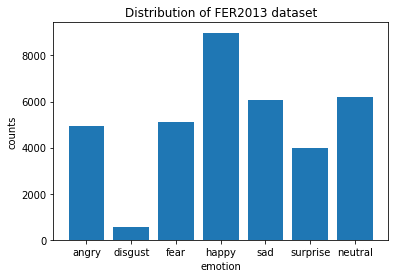

In [8]:
plt.bar(data=emotion, x='emotion', height='total')
plt.title('Distribution of FER2013 dataset')
plt.xlabel('emotion')
plt.ylabel('counts')
plt.show()

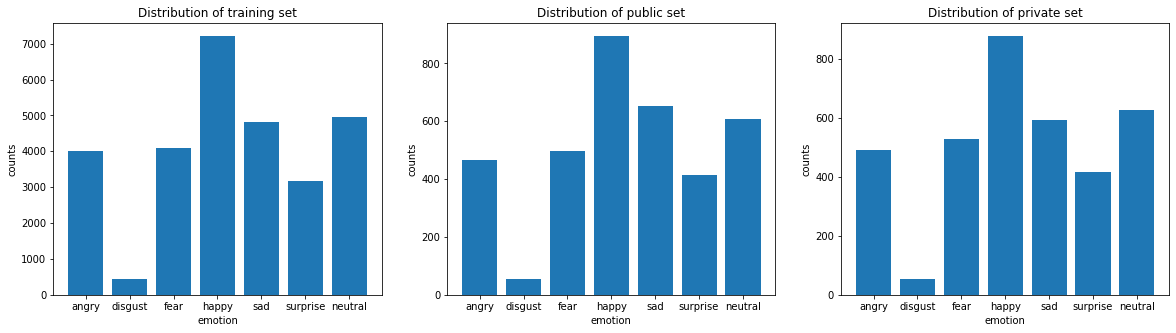

In [9]:
cols = list(emotion.columns[1:-1])
fig, axs = plt.subplots(1, len(cols), figsize=(20, 5))
axs = axs.ravel()
for i in range(len(axs)):
    axs[i].bar(data=emotion, x='emotion', height=cols[i])
    axs[i].set_title(f'Distribution of {cols[i]} set')
    axs[i].set_ylabel('counts')
    axs[i].set_xlabel('emotion')

In [10]:
size = (48, 48)

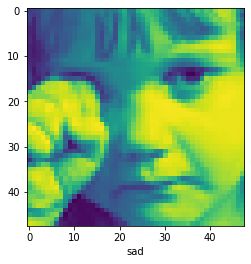

In [11]:
def show_pic(idx=np.random.choice(df.shape[0])):
    # plt.axis('off')
    plt.imshow(np.fromstring(df['pixels'][idx], dtype=int, sep=' ').reshape(size))
    plt.xlabel(emotion_dic.get(df['emotion'][idx]))
    plt.show()
show_pic()

In [12]:
img_arr = np.array([np.fromstring(df['pixels'][i], dtype=int, sep=' ').reshape(size) for i in df.index])

In [13]:
img_arr.shape

(35887, 48, 48)

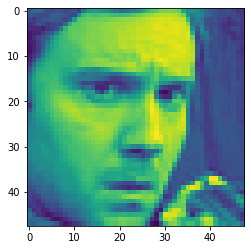

In [14]:
plt.imshow(img_arr[0])

In [15]:
img_label = np.array(df['emotion'])

In [16]:
emotion_dic.get(img_label[0])

'angry'

In [17]:
n_classes = df['emotion'].unique().shape[0]

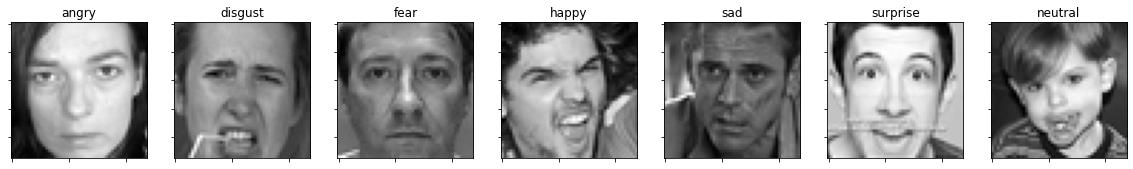

In [18]:
fig, axs = plt.subplots(1, n_classes, figsize=(20, 15))
axs = axs.ravel()
for i in range(len(axs)):
    idx = df[df['emotion']==i].sample().index[0]
    axs[i].imshow(img_arr[idx], cmap='gray')
    axs[i].set_title(emotion_dic.get(img_label[idx]))
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])

In [19]:
def plot_samples(label):
    fig, axs = plt.subplots(1, 5, figsize=(20, 15))
    axs = axs.ravel()
    for i in range(len(axs)):
        idx = df[df['emotion']==label].sample().index[0]
        axs[i].imshow(img_arr[idx], cmap='gray')
        axs[i].set_title(emotion_dic.get(img_label[idx]))
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

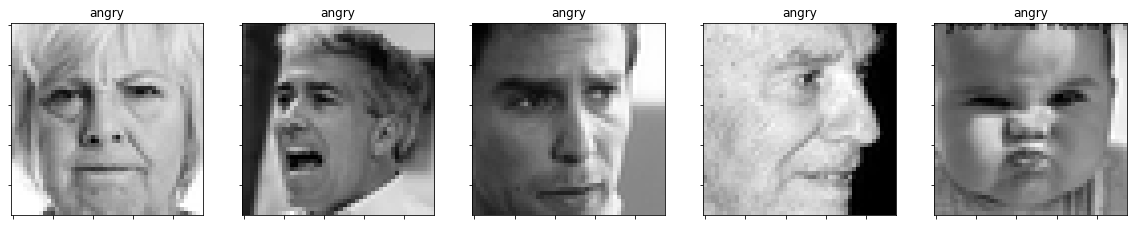

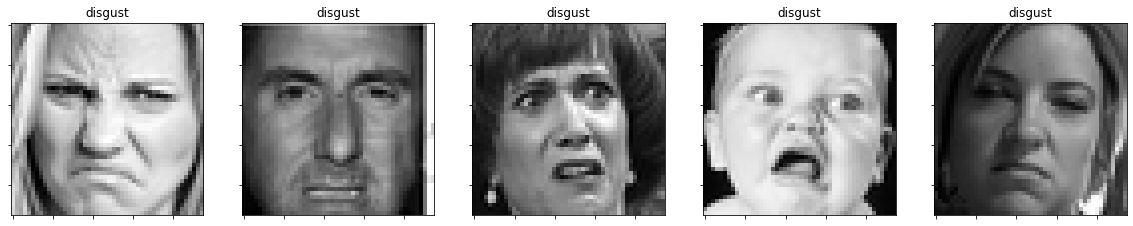

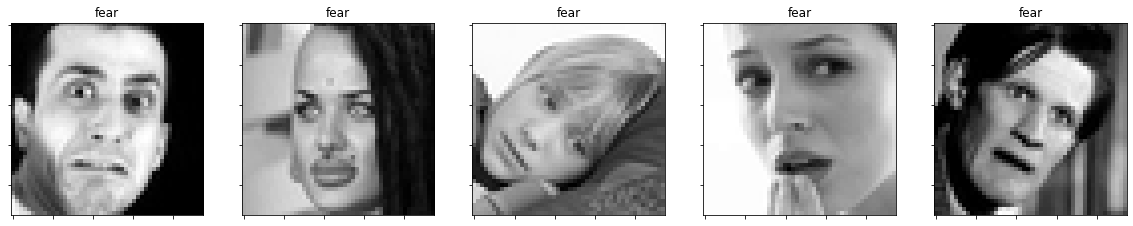

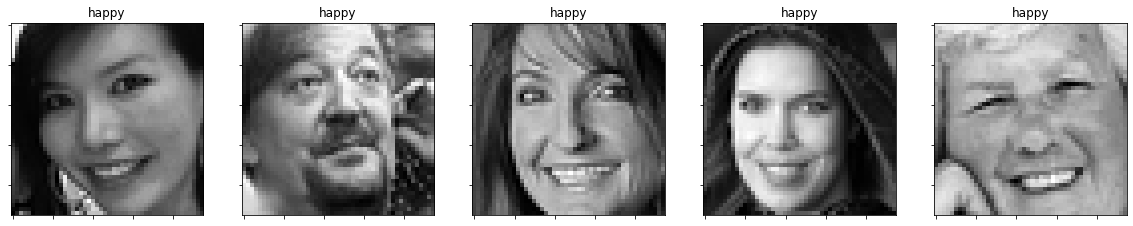

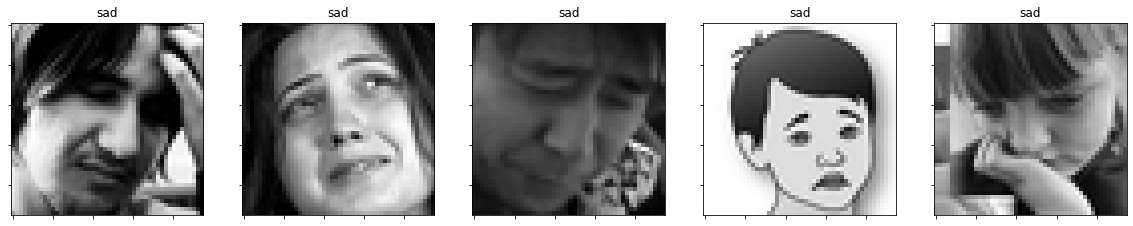

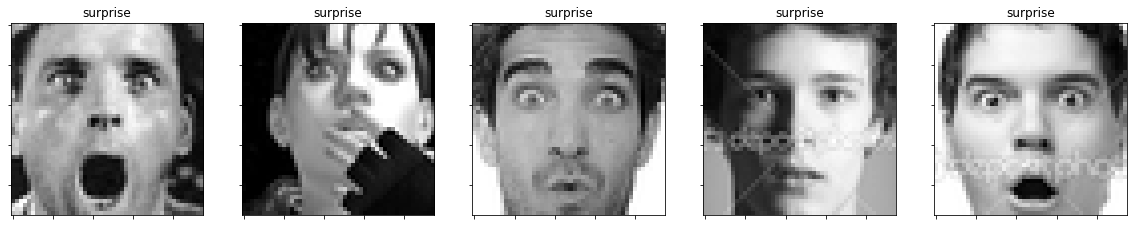

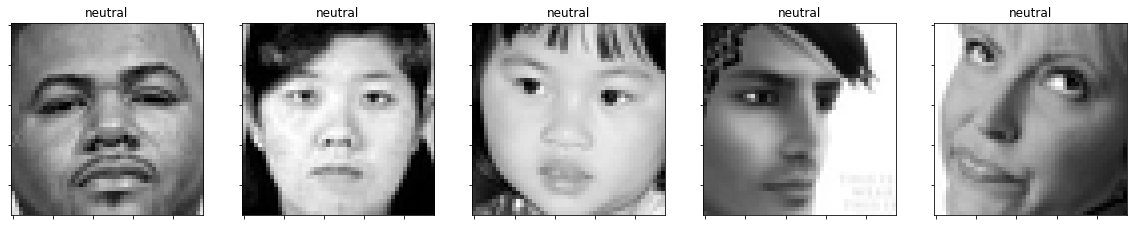

In [20]:
for i in range(n_classes):
    plot_samples(i)

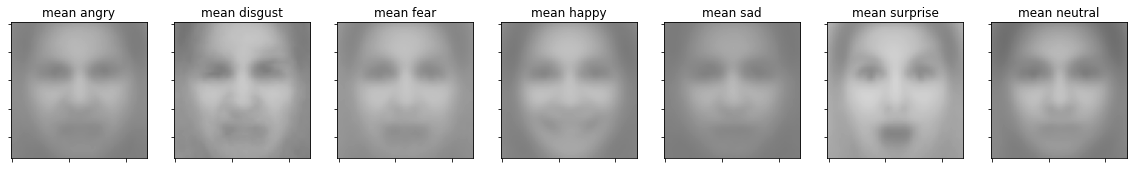

In [22]:
fig, axs = plt.subplots(1, n_classes, figsize=(20, 15))
axs = axs.ravel()
for i in range(len(axs)):
    mean_arr = img_arr[img_label==i]
    mean_img = np.mean(mean_arr, axis=0).reshape(size)
#     axs[i].imshow(mean_img, cmap='gray')
    axs[i].imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    axs[i].set_title(f'mean {emotion_dic.get(i)}')
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])

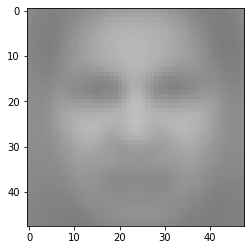

In [23]:
mean_angry_arr = img_arr[img_label==0]
mean_angry = np.mean(mean_angry_arr, axis=0).reshape(size)
plt.imshow(mean_angry, vmin=0, vmax=255, cmap='Greys_r')

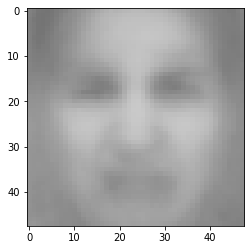

In [24]:
mean_disgust_arr = img_arr[img_label==1]
mean_disgust = np.mean(mean_disgust_arr, axis=0).reshape(size)
plt.imshow(mean_disgust, vmin=0, vmax=255, cmap='Greys_r')

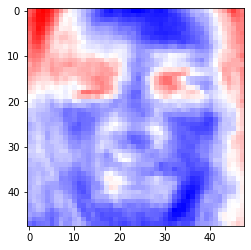

In [25]:
var = mean_angry - mean_disgust
plt.imshow(var, cmap='bwr')

In [26]:
def plot_contrast(j):    
    mean_arr1 = img_arr[img_label==j]
    mean_img1 = np.mean(mean_arr1, axis=0).reshape(size)
    fig, axs = plt.subplots(1, n_classes, figsize=(20, 15))
    axs = axs.ravel()
    for i in range(len(axs)):
        mean_arr2 = img_arr[img_label==i]
        mean_img2 = np.mean(mean_arr2, axis=0).reshape(size)
        mean_contrast = mean_img1 - mean_img2
        axs[i].imshow(mean_contrast, cmap='bwr')
        axs[i].set_title(f'{emotion_dic.get(j)} - {emotion_dic.get(i)}')
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

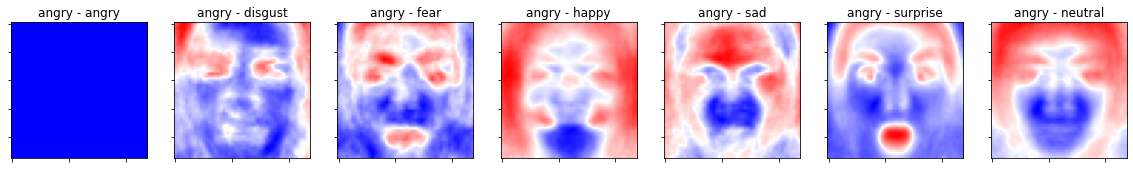

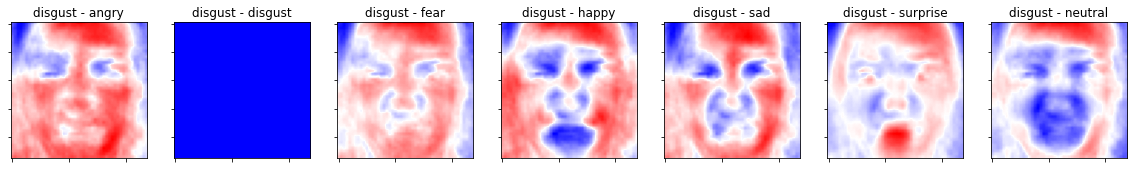

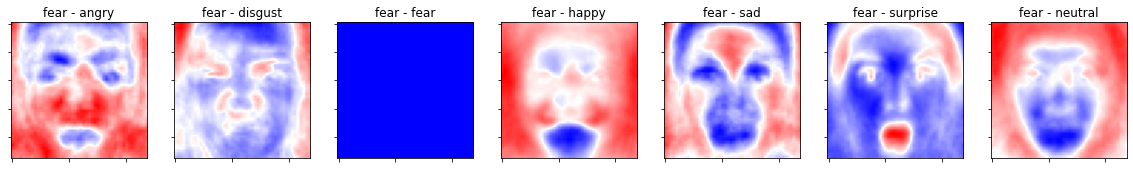

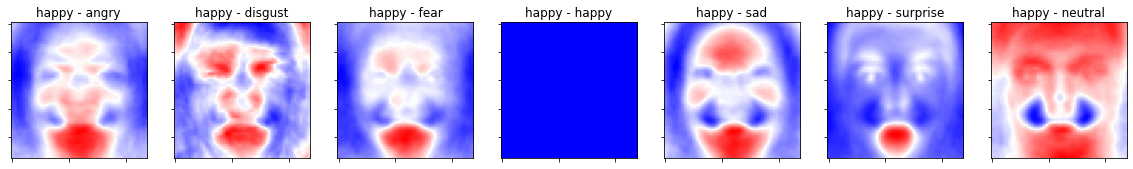

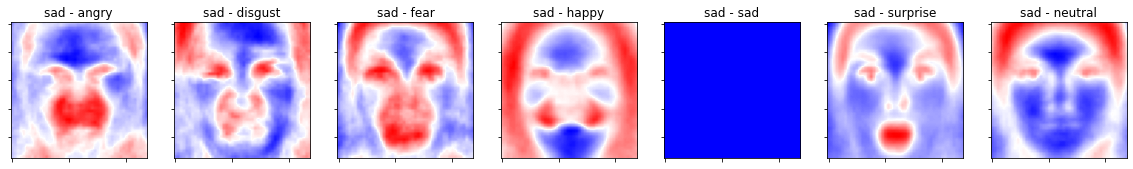

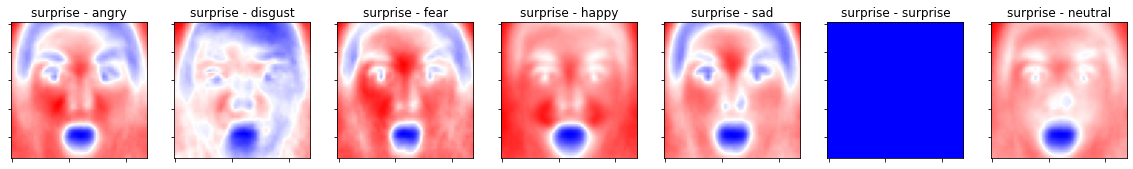

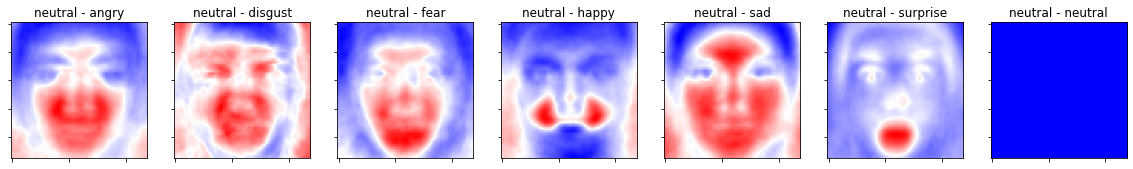

In [27]:
for i in range(n_classes):
    plot_contrast(i)

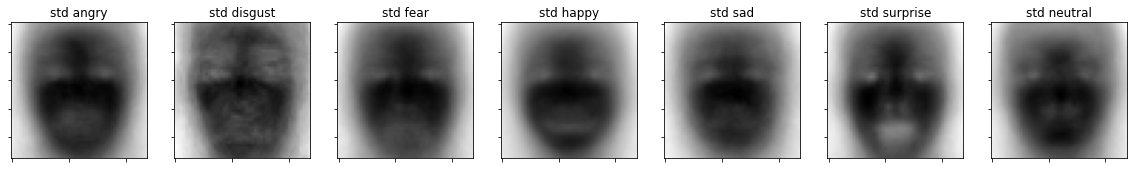

In [28]:
fig, axs = plt.subplots(1, n_classes, figsize=(20, 15))
axs = axs.ravel()
for i in range(len(axs)):
    std_arr = img_arr[img_label==i]
    std_img = np.std(std_arr, axis=0).reshape(size)
    axs[i].imshow(std_img, cmap='gray')
#     axs[i].imshow(std_img, vmin=0, vmax=255, cmap='Greys_r')
    axs[i].set_title(f'std {emotion_dic.get(i)}')
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])